In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score


from imblearn.over_sampling import SMOTE



import warnings
warnings.filterwarnings('ignore')

## Load data set

In [2]:
#Import financial risk analysis dataset
df = pd.read_csv('financial_risk_analysis_large.csv')

df.head()

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,63295,18830,13,29,Self-Employed,Widowed,2,Doctorate,Other,...,24,378,3741,40058,977,412,399,136,124,0
1,735,55936,23729,1,42,Self-Employed,Divorced,3,Master,Own,...,10,575,4115,16745,695,206,898,252,131,0
2,570,62547,19660,7,54,Self-Employed,Single,3,Doctorate,Mortgage,...,16,691,4105,23273,627,266,392,73,36,0
3,406,46129,21674,23,25,Self-Employed,Divorced,3,High School,Other,...,6,452,4559,42163,397,307,250,378,-32,0
4,371,57725,12189,26,42,Employed,Widowed,4,Master,Own,...,2,690,7856,30087,723,315,114,88,68,0


## Data Exploration

In [3]:
#Shape of data

df.shape

(1000000, 51)

In [4]:
#Check for missing values
df.isnull().sum()

CreditScore                   0
AnnualIncome                  0
LoanAmount                    0
LoanDuration                  0
Age                           0
EmploymentStatus              0
MaritalStatus                 0
NumberOfDependents            0
EducationLevel                0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
InterestRate                  0
PaymentHistory                0
SavingsAccountBalance         0
CheckingAccountBalance        0
InvestmentAccountBalance      0
RetirementAccountBalance      0
EmergencyFundBalance          0
TotalAssets                   0
TotalLiabilities              0
NetWorth                      0
LengthOfCreditHistory         0
MortgageBalance               0
RentPayments                  0
AutoLoan

In [5]:
#Check for duplicates

print(df.index.has_duplicates)

False


In [6]:
df.dtypes

CreditScore                     int64
AnnualIncome                    int64
LoanAmount                      int64
LoanDuration                    int64
Age                             int64
EmploymentStatus               object
MaritalStatus                  object
NumberOfDependents              int64
EducationLevel                 object
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
InterestRate                  float64
PaymentHistory                  int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
InvestmentAccountBalance        int64
RetirementAccountBalance        int64
EmergencyFundBalance            int64
TotalAssets                     int64
TotalLiabili

In [7]:
df.columns

Index(['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age',
       'EmploymentStatus', 'MaritalStatus', 'NumberOfDependents',
       'EducationLevel', 'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'InterestRate', 'PaymentHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance',
       'InvestmentAccountBalance', 'RetirementAccountBalance',
       'EmergencyFundBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth',
       'LengthOfCreditHistory', 'MortgageBalance', 'RentPayments',
       'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance',
       'UtilityBillsPaymentHistory', 'HealthInsuranceStatus',
       'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus',
       'OtherInsurancePolicies', 'EmployerType', 'JobTenure', 'MonthlySavings',
       'AnnualB

In [8]:
df.describe()

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,574.559628,59971.227298,20001.643495,15.014402,43.497517,1.999334,499.712597,4.999768e-01,7.005118,4.501799,...,19.500790,499.097705,4999.802337,29990.070722,999.821493,299.567663,399.724339,199.424883,99.458080,0.373169
std,158.774753,15013.989902,5000.662270,8.363599,15.005348,1.415219,199.942646,2.885894e-01,4.318280,2.872479,...,11.541492,299.700808,1999.559754,9994.979331,400.084107,149.851337,199.959738,99.921983,49.931612,0.483647
min,300.000000,-9666.000000,-4900.000000,1.000000,18.000000,0.000000,-539.000000,5.038985e-07,0.000000,0.000000,...,0.000000,-937.000000,-3934.000000,-18396.000000,-1093.000000,-399.000000,-543.000000,-353.000000,-123.000000,0.000000
25%,437.000000,49855.000000,16630.000000,8.000000,30.000000,1.000000,365.000000,2.500684e-01,3.000000,2.000000,...,10.000000,297.000000,3650.000000,23246.000000,730.000000,198.000000,265.000000,132.000000,66.000000,0.000000
50%,574.000000,59973.000000,20006.000000,15.000000,43.000000,2.000000,499.000000,5.003170e-01,7.000000,5.000000,...,20.000000,499.000000,4999.000000,29998.000000,1000.000000,299.000000,400.000000,199.000000,99.000000,0.000000
75%,712.000000,70080.000000,23376.000000,22.000000,56.000000,3.000000,635.000000,7.497447e-01,11.000000,7.000000,...,29.000000,701.000000,6348.000000,36736.000000,1270.000000,401.000000,535.000000,267.000000,133.000000,1.000000
max,849.000000,132414.000000,44921.000000,29.000000,69.000000,4.000000,1504.000000,9.999982e-01,14.000000,9.000000,...,39.000000,2048.000000,14312.000000,79463.000000,2846.000000,1024.000000,1363.000000,670.000000,326.000000,1.000000


## Data preparing and cleaning

In [9]:
#Rename columns for PowerBi

df.rename(columns={
    'CreditScore': 'credit_score',
    'AnnualIncome': 'annual_income',
    'LoanAmount': 'loan_amount',
    'LoanDuration': 'loan_duration',
    'EmploymentStatus': 'employment_status',
    'MaritalStatus': 'marital_status',
    'NumberOfDependents': 'dependents',
    'EducationLevel': 'education_level',
    'HomeOwnershipStatus': 'home_ownership',
    'MonthlyDebtPayments': 'monthly_debt',
    'CreditCardUtilizationRate': 'credit_utilization',
    'NumberOfOpenCreditLines': 'open_credit_lines',
    'NumberOfCreditInquiries': 'credit_inquiries',
    'DebtToIncomeRatio': 'debt_to_income',
    'BankruptcyHistory': 'bankruptcy_history',
    'LoanPurpose': 'loan_purpose',
    'PreviousLoanDefaults': 'prev_loan_defaults',
    'InterestRate': 'interest_rate',
    'PaymentHistory': 'payment_history',
    'SavingsAccountBalance': 'savings_balance',
    'CheckingAccountBalance': 'checking_balance',
    'InvestmentAccountBalance': 'investment_balance',
    'RetirementAccountBalance': 'retirement_balance',
    'EmergencyFundBalance': 'emergency_fund',
    'TotalAssets': 'total_assets',
    'TotalLiabilities': 'total_liabilities',
    'NetWorth': 'net_worth',
    'LengthOfCreditHistory': 'credit_history_length',
    'MortgageBalance': 'mortgage_balance',
    'RentPayments': 'rent_payments',
    'AutoLoanBalance': 'auto_loan_balance',
    'PersonalLoanBalance': 'personal_loan_balance',
    'StudentLoanBalance': 'student_loan_balance',
    'UtilityBillsPaymentHistory': 'utility_payment_history',
    'HealthInsuranceStatus': 'health_insurance',
    'LifeInsuranceStatus': 'life_insurance',
    'CarInsuranceStatus': 'car_insurance',
    'HomeInsuranceStatus': 'home_insurance',
    'OtherInsurancePolicies': 'other_insurance',
    'EmployerType': 'employer_type',
    'JobTenure': 'job_tenure',
    'MonthlySavings': 'monthly_savings',
    'AnnualBonuses': 'annual_bonuses',
    'AnnualExpenses': 'annual_expenses',
    'MonthlyHousingCosts': 'monthly_housing',
    'MonthlyTransportationCosts': 'monthly_transportation',
    'MonthlyFoodCosts': 'monthly_food',
    'MonthlyHealthcareCosts': 'monthly_healthcare',
    'MonthlyEntertainmentCosts': 'monthly_entertainment',
    'LoanApproved': 'loan_approved'
}, inplace=True)


In [10]:
#Make 'Age' lowercased
df.rename(columns={'Age': 'age'}, inplace=True)

In [11]:
#Handle any missing data or weird values

df = df.dropna()

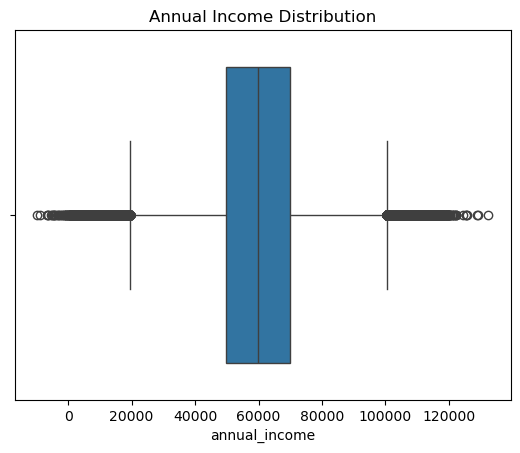

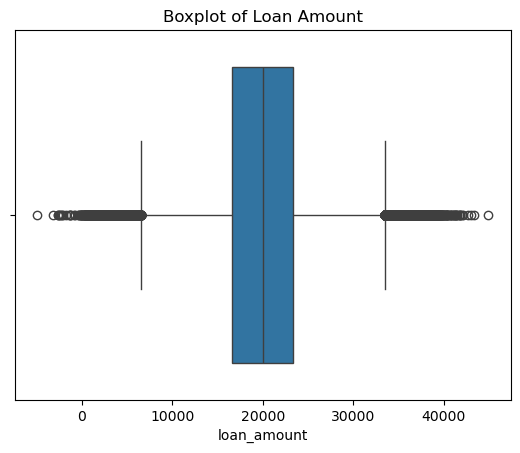

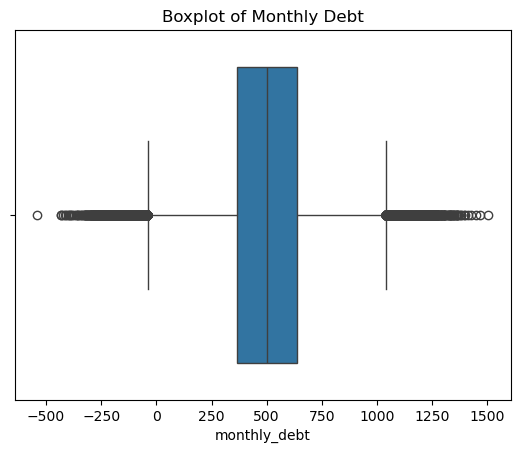

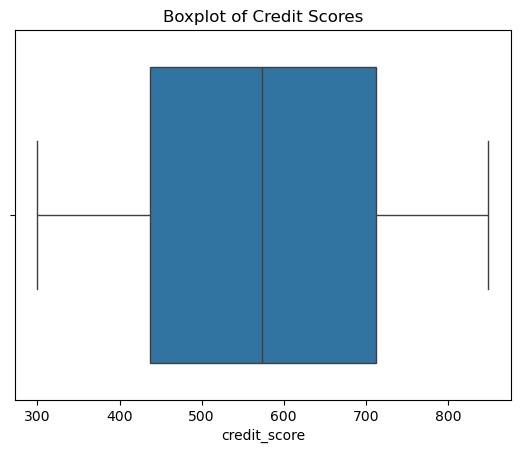

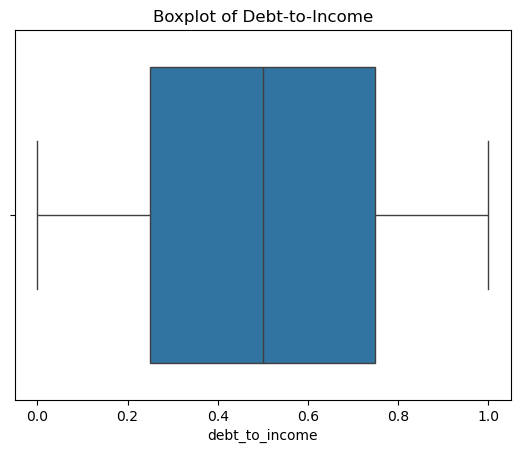

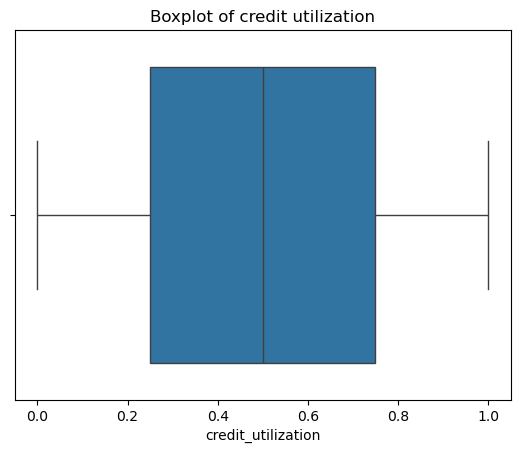

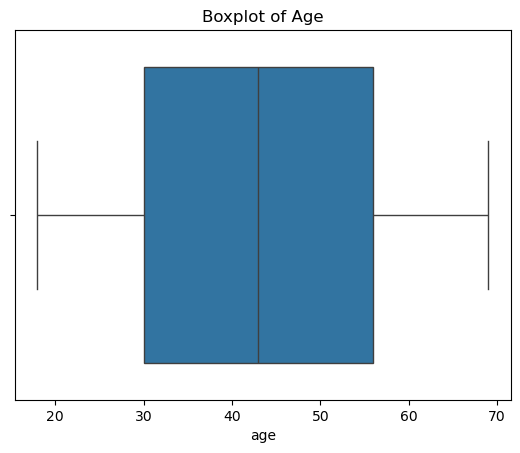

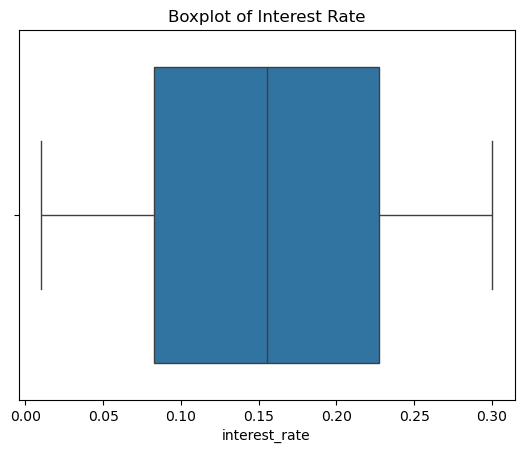

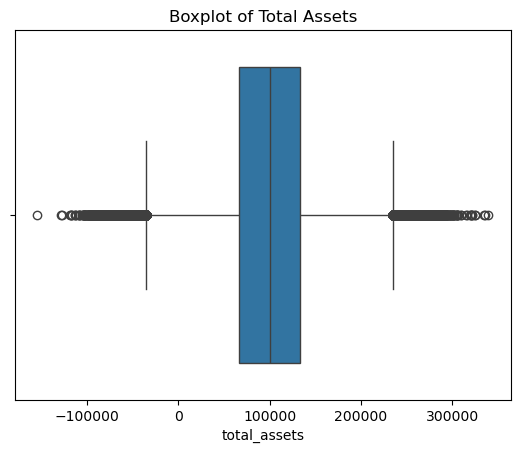

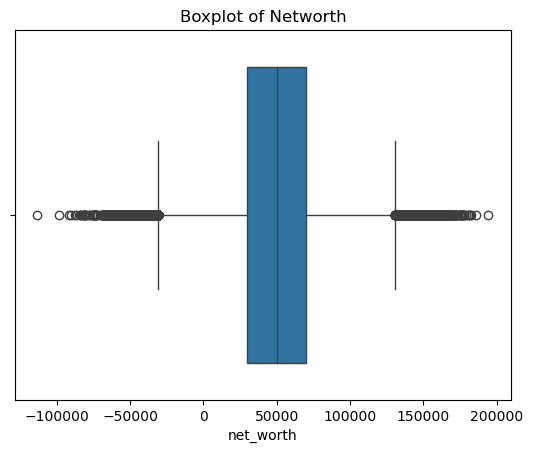

In [12]:
#Check for outliers

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['annual_income'])
plt.title('Annual Income Distribution')
plt.show()

sns.boxplot(x=df['loan_amount'])
plt.title('Boxplot of Loan Amount')
plt.show()

sns.boxplot(x=df['monthly_debt'])
plt.title('Boxplot of Monthly Debt')
plt.show()

sns.boxplot(x=df['credit_score'])
plt.title('Boxplot of Credit Scores')
plt.show()

sns.boxplot(x=df['debt_to_income'])
plt.title('Boxplot of Debt-to-Income')
plt.show()

sns.boxplot(x=df['credit_utilization'])
plt.title('Boxplot of credit utilization')
plt.show()

sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.show()

sns.boxplot(x=df['interest_rate'])
plt.title('Boxplot of Interest Rate')
plt.show()

sns.boxplot(x=df['total_assets'])
plt.title('Boxplot of Total Assets')
plt.show()

sns.boxplot(x=df['net_worth'])
plt.title('Boxplot of Networth')
plt.show()

In [13]:
from scipy.stats import zscore

# Flag outliers in key numerical columns
outlier_sensitive_cols = ['annual_income', 'loan_amount', 'monthly_debt', 'credit_score', 'debt_to_income']
z_scores = df[outlier_sensitive_cols].apply(zscore)
df['is_outlier'] = (z_scores.abs() > 3).any(axis=1)


In [14]:
#Save Original df (renamed & encoded) for PowerBi
df.to_csv("original_data.csv", index=False)

## Annual income, Loan amount, monthly debt, total assets, and networth have outliers

In [15]:
#Remove outliers using IQR

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Columns to apply IQR filtering to
outlier_sensitive_cols = [
    'annual_income', 'loan_amount', 'monthly_debt', 'credit_score',
    'debt_to_income', 'interest_rate', 'total_assets', 'total_liabilities',
    'net_worth', 'monthly_housing', 'monthly_transportation',
    'monthly_food', 'monthly_healthcare', 'monthly_entertainment'
]

# Apply IQR filtering
for col in outlier_sensitive_cols:
    df = remove_outliers_iqr(df, col)


In [16]:
# Clip extreme values to the 1st and 99th percentiles
for col in [
    'annual_income', 'loan_amount', 'monthly_debt', 'credit_score',
    'debt_to_income', 'interest_rate', 'total_assets', 'total_liabilities',
    'net_worth', 'monthly_housing', 'monthly_transportation',
    'monthly_food', 'monthly_healthcare', 'monthly_entertainment'
]:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)


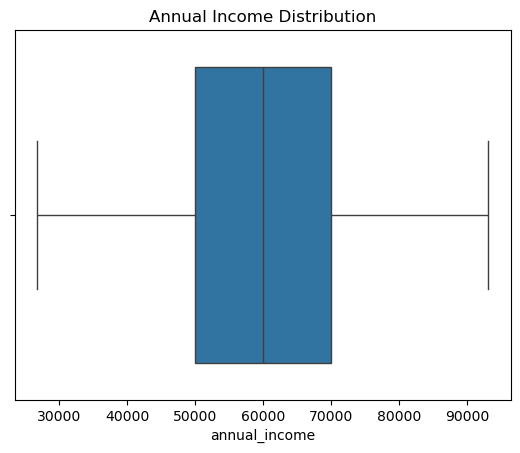

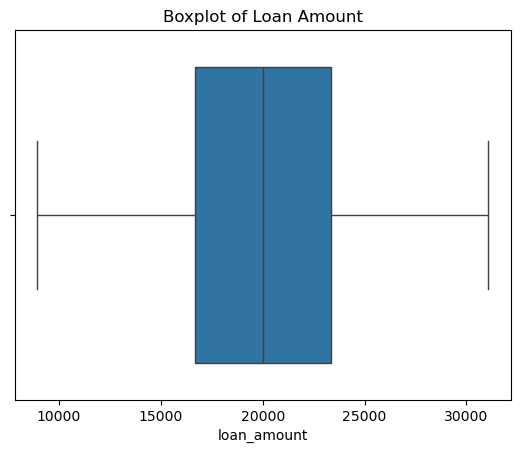

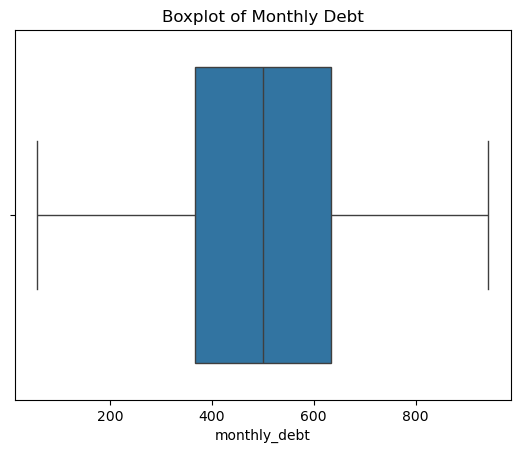

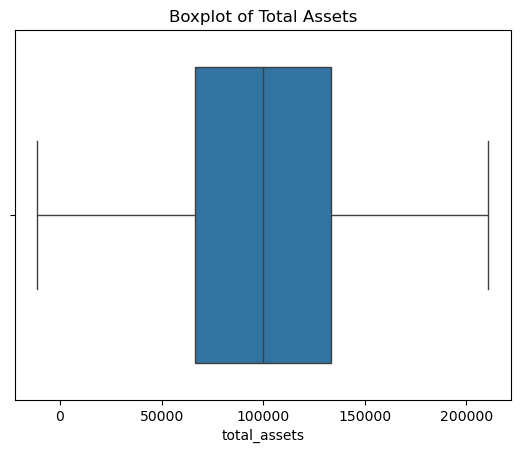

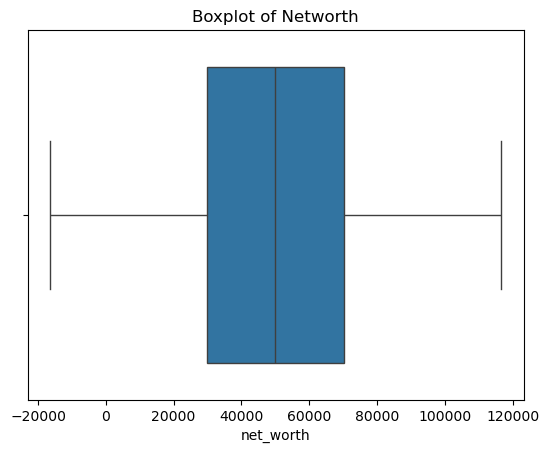

In [17]:
sns.boxplot(x=df['annual_income'])
plt.title('Annual Income Distribution')
plt.show()

sns.boxplot(x=df['loan_amount'])
plt.title('Boxplot of Loan Amount')
plt.show()

sns.boxplot(x=df['monthly_debt'])
plt.title('Boxplot of Monthly Debt')
plt.show()

sns.boxplot(x=df['total_assets'])
plt.title('Boxplot of Total Assets')
plt.show()

sns.boxplot(x=df['net_worth'])
plt.title('Boxplot of Networth')
plt.show()

In [18]:
#Check if data is skewed 

skew_check_columns = [
    'annual_income', 'loan_amount', 'monthly_debt', 'credit_score',
    'debt_to_income', 'interest_rate', 'total_assets', 'total_liabilities',
    'net_worth', 'monthly_housing', 'monthly_food', 'monthly_transportation',
    'monthly_healthcare', 'monthly_entertainment'
]

# Check skewness
df[skew_check_columns].skew().sort_values(ascending=False)

monthly_food              0.003488
monthly_healthcare        0.002270
monthly_entertainment     0.002116
monthly_transportation    0.001810
monthly_debt              0.001539
total_liabilities         0.001504
credit_score              0.001126
total_assets              0.000820
net_worth                 0.000623
monthly_housing           0.000276
annual_income            -0.000081
debt_to_income           -0.000581
loan_amount              -0.001488
interest_rate            -0.002156
dtype: float64

## Preprocess Data for modeling

In [19]:
#Encode categorical variables
categorical_cols = [
    'employment_status', 'marital_status', 'education_level',
    'home_ownership', 'loan_purpose', 'payment_history',
    'health_insurance', 'life_insurance', 'car_insurance',
    'home_insurance', 'other_insurance', 'employer_type'
]


# Generate a category map
for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")

employment_status unique values: ['Self-Employed' 'Employed' 'Unemployed']
marital_status unique values: ['Widowed' 'Divorced' 'Single' 'Married']
education_level unique values: ['Doctorate' 'Master' 'High School' 'Associate' 'Bachelor']
home_ownership unique values: ['Other' 'Own' 'Mortgage' 'Rent']
loan_purpose unique values: ['Education' 'Debt Consolidation' 'Other' 'Home' 'Auto']
payment_history unique values: [12 18 29 19 13 26  6 25  3 15 10 23  5 21 14  9 20  8 24  2 11  1  0  7
 28 17 16 22  4 27]
health_insurance unique values: ['Insured' 'Uninsured']
life_insurance unique values: ['Insured' 'Uninsured']
car_insurance unique values: ['Insured' 'Uninsured']
home_insurance unique values: ['Insured' 'Uninsured']
other_insurance unique values: [4 3 1 0 2]
employer_type unique values: ['Self-Employed' 'Private' 'Other' 'Public']


In [20]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [21]:
#Save cleaned df ()
df.to_csv("cleaned_data.csv", index=False)

In [22]:
print(df.dtypes[df.dtypes == "object"])

Series([], dtype: object)


In [23]:
df.head()

,credit_score,annual_income,loan_amount,loan_duration,age,dependents,monthly_debt,credit_utilization,open_credit_lines,credit_inquiries,...,life_insurance_Uninsured,car_insurance_Uninsured,home_insurance_Uninsured,other_insurance_1,other_insurance_2,other_insurance_3,other_insurance_4,employer_type_Private,employer_type_Public,employer_type_Self-Employed
0,402,63295,18830,13,29,2,675,0.144528,11,2,...,False,False,False,False,False,False,True,False,False,True
1,735,55936,23729,1,42,3,508,0.690435,9,8,...,True,True,True,False,False,False,True,True,False,False
2,570,62547,19660,7,54,3,610,0.388420,10,3,...,False,True,True,False,False,True,False,False,False,False
3,406,46129,21674,23,25,3,469,0.749665,11,9,...,True,False,True,True,False,False,False,False,True,False
4,371,57725,12189,26,42,4,607,0.969138,6,9,...,False,True,False,False,False,False,False,False,False,False


In [24]:
#Split features into X and Y
X = df.drop(['loan_approved'], axis=1)  # Features
y = df['loan_approved']  # Target

In [25]:
print(X)

        credit_score  annual_income  loan_amount  loan_duration  age  \
0                402          63295        18830             13   29   
1                735          55936        23729              1   42   
2                570          62547        19660              7   54   
3                406          46129        21674             23   25   
4                371          57725        12189             26   42   
...              ...            ...          ...            ...  ...   
999993           568          66269        20429             24   63   
999995           414          83679        19053             10   54   
999997           668          55138        13939             28   52   
999998           627          62867        19115              8   23   
999999           840          54393        20428             19   60   

        dependents  monthly_debt  credit_utilization  open_credit_lines  \
0                2           675            0.144528        

In [26]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
999993    1
999995    0
999997    0
999998    0
999999    0
Name: loan_approved, Length: 926293, dtype: int64


In [27]:
X = df.drop('loan_approved', axis=1)
y = df['loan_approved']

# 👇 Add this BEFORE train_test_split
print("Class distribution:")
print(y.value_counts(normalize=True))

Class distribution:
loan_approved
0    0.625476
1    0.374524
Name: proportion, dtype: float64


## Dataset is mildly imbalanced

In [28]:
# Split the data into training and testing sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
print("Training class distribution:")
print(y_train.value_counts(normalize=True))

print("Testing class distribution:")
print(y_test.value_counts(normalize=True))

Training class distribution:
loan_approved
0    0.625476
1    0.374524
Name: proportion, dtype: float64
Testing class distribution:
loan_approved
0    0.625476
1    0.374524
Name: proportion, dtype: float64


# Decision Tree

In [30]:
# Train the DT model
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10, random_state=42)  # You can tune max_depth later
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [31]:
# Predict
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75    115875
           1       0.60      1.00      0.75     69384

    accuracy                           0.75    185259
   macro avg       0.80      0.80      0.75    185259
weighted avg       0.85      0.75      0.75    185259



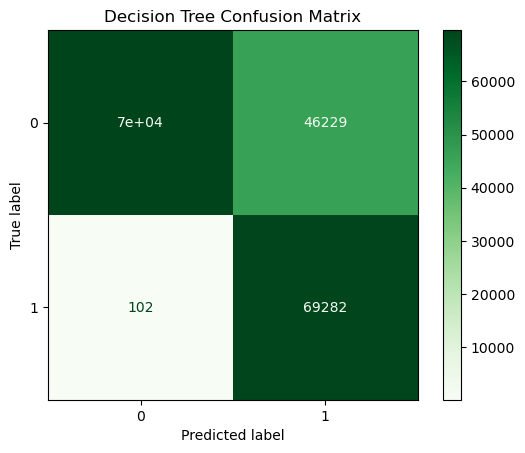

Decision Tree ROC AUC Score: 0.7999


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# ROC AUC
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)
print(f"Decision Tree ROC AUC Score: {roc_auc_tree:.4f}")

# Rain Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.63      0.75    115875
           1       0.60      0.93      0.73     69384

    accuracy                           0.74    185259
   macro avg       0.77      0.78      0.74    185259
weighted avg       0.81      0.74      0.74    185259

ROC AUC Score: 0.7999


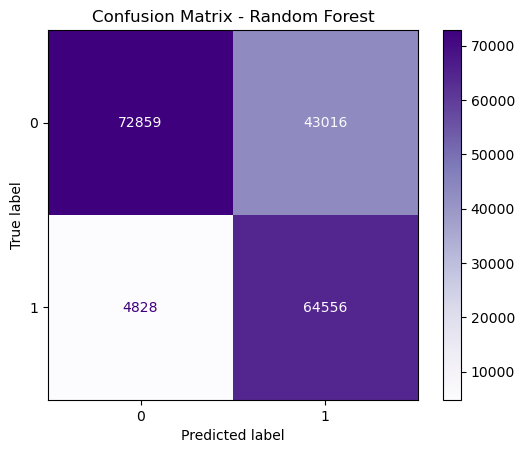

In [34]:
#Evaluate the Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_rf):.4f}")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Purples')
plt.title("Confusion Matrix - Random Forest")
plt.show()

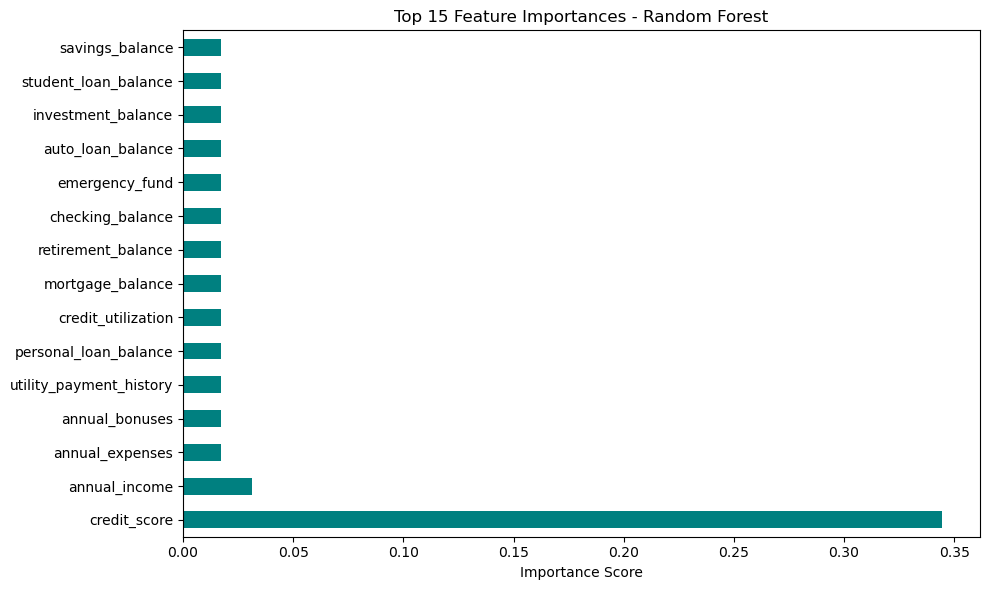

In [35]:
import pandas as pd
import numpy as np

#Feature importance Plot
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## Preprocess and Scale Features

In [36]:
#Feature Engineering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [37]:
# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [38]:
# Make predictions on the test data
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]  #Probabilities for ROC AUC


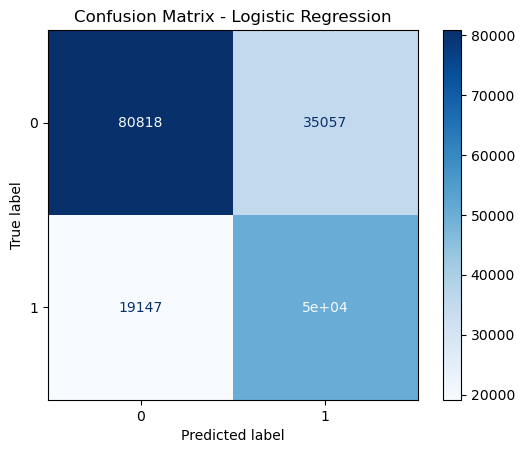

In [39]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [40]:
#Classification Report of Logistic Regression
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_log))

roc_auc = roc_auc_score(y_test, y_prob_log)
print(f"ROC AUC Score: {roc_auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75    115875
           1       0.59      0.72      0.65     69384

    accuracy                           0.71    185259
   macro avg       0.70      0.71      0.70    185259
weighted avg       0.73      0.71      0.71    185259

ROC AUC Score: 0.7909


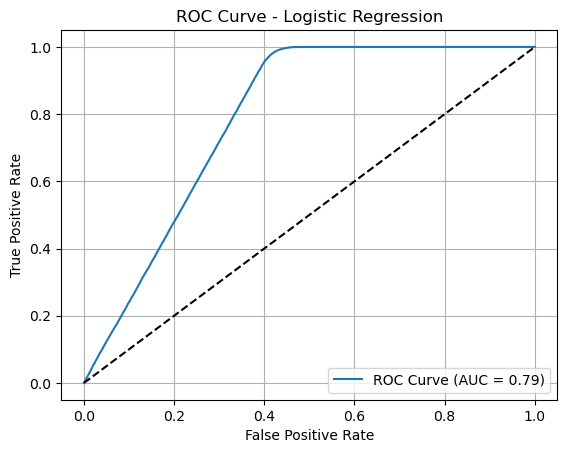

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Tune the Decision Threshold for Logistic Regression

# Try multiple thresholds
thresholds = np.arange(0.3, 0.71, 0.05)
for t in thresholds:
    y_pred_thresh = (y_prob_log >= t).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold: {t:.2f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}")

Threshold: 0.30 | Precision: 0.578 | Recall: 0.992 | F1: 0.730
Threshold: 0.35 | Precision: 0.589 | Recall: 0.933 | F1: 0.722
Threshold: 0.40 | Precision: 0.589 | Recall: 0.861 | F1: 0.699
Threshold: 0.45 | Precision: 0.589 | Recall: 0.791 | F1: 0.675
Threshold: 0.50 | Precision: 0.589 | Recall: 0.724 | F1: 0.650
Threshold: 0.55 | Precision: 0.589 | Recall: 0.656 | F1: 0.621
Threshold: 0.60 | Precision: 0.589 | Recall: 0.586 | F1: 0.588
Threshold: 0.65 | Precision: 0.589 | Recall: 0.513 | F1: 0.548
Threshold: 0.70 | Precision: 0.589 | Recall: 0.435 | F1: 0.501


In [43]:
y_pred_custom = (y_prob_log >= 0.35).astype(int)

In [44]:
#Classification Report of Logistic Regression (Updated)
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_custom))

#ROC AUC Score
from sklearn.metrics import roc_auc_score

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74    115875
           1       0.59      0.93      0.72     69384

    accuracy                           0.73    185259
   macro avg       0.76      0.77      0.73    185259
weighted avg       0.81      0.73      0.73    185259



# Neural Network

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

#Set up EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [46]:
#Build the model
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

In [47]:
#Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
#Train the model
history = nn_model.fit(X_train_scaled, y_train,epochs=20,batch_size=256,validation_data=(X_test_scaled, y_test),callbacks=[early_stop], verbose=1, )


Epoch 1/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6937 - loss: 0.5197 - val_accuracy: 0.7339 - val_loss: 0.4423
Epoch 2/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.7380 - loss: 0.4387 - val_accuracy: 0.7432 - val_loss: 0.4346
Epoch 3/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7457 - loss: 0.4317 - val_accuracy: 0.7446 - val_loss: 0.4314
Epoch 4/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7468 - loss: 0.4292 - val_accuracy: 0.7451 - val_loss: 0.4307
Epoch 5/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7470 - loss: 0.4276 - val_accuracy: 0.7458 - val_loss: 0.4293
Epoch 6/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.7479 - loss: 0.4268 - val_accuracy: 0.7462 - val_loss: 0.4286
Epoch 7/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7475 - loss: 0.4266 - val_accuracy: 0.7462 - val_loss: 0.4289
Epoch 8/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7486 - loss: 0.

In [49]:
#Evaluate the model
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

5790/5790 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7484 - loss: 0.4271
Test Accuracy: 0.7471


In [50]:
#Predict & Classify

y_prob_nn = nn_model.predict(X_test_scaled).flatten()
y_pred_nn = (y_prob_nn >= 0.5).astype(int)


5790/5790 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


In [51]:
from sklearn.metrics import classification_report, roc_auc_score

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

roc_auc_nn = roc_auc_score(y_test, y_prob_nn)
print(f"ROC AUC Score: {roc_auc_nn:.4f}")


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.61      0.75    115875
           1       0.60      0.98      0.74     69384

    accuracy                           0.75    185259
   macro avg       0.79      0.79      0.75    185259
weighted avg       0.84      0.75      0.75    185259

ROC AUC Score: 0.8005


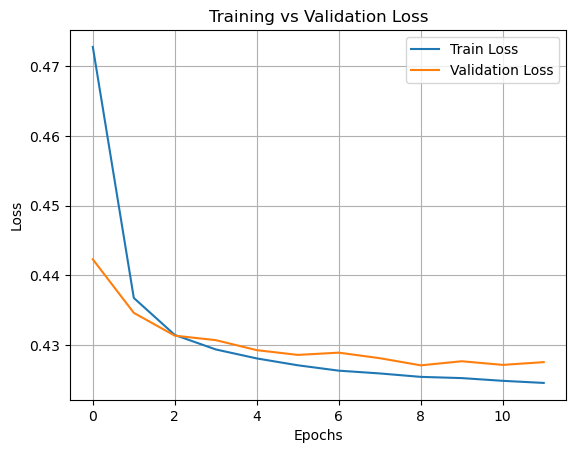

In [52]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Comparison Chart

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
log_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_custom),
    'Precision': precision_score(y_test, y_pred_custom),
    'Recall': recall_score(y_test, y_pred_log),
    'F1-Score': f1_score(y_test, y_pred_log),
    'ROC AUC': roc_auc_score(y_test, y_prob_log)
}

# Decision Tree
tree_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_tree),
    'Precision': precision_score(y_test, y_pred_tree),
    'Recall': recall_score(y_test, y_pred_tree),
    'F1-Score': f1_score(y_test, y_pred_tree),
    'ROC AUC': roc_auc_score(y_test, y_prob_tree)
}

# Random Forest
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_prob_rf)
}

# Neural Network
nn_metrics = {
    'Model': 'Neural Network',
    'Accuracy': accuracy_score(y_test, y_pred_nn),
    'Precision': precision_score(y_test, y_pred_nn),
    'Recall': recall_score(y_test, y_pred_nn),
    'F1-Score': f1_score(y_test, y_pred_nn),
    'ROC AUC': roc_auc_score(y_test, y_prob_nn)
}


In [54]:
# Import pandas if you haven't yet
import pandas as pd

# Create a comparison table
results_df = pd.DataFrame([log_metrics, tree_metrics, rf_metrics, nn_metrics])

# Round the numbers to 4 decimal places for readability
results_df = results_df.round(4)

# Show the table
print(results_df)


                 Model  Accuracy  Precision  Recall  F1-Score  ROC AUC
0  Logistic Regression    0.7309     0.5888  0.7240    0.6496   0.7909
1        Decision Tree    0.7499     0.5998  0.9985    0.7494   0.7999
2        Random Forest    0.7417     0.6001  0.9304    0.7296   0.7999
3       Neural Network    0.7471     0.5990  0.9828    0.7443   0.8005


## The best model is the FCNN based on the results.

# Lending Club Loan Data

In [55]:
#Load accepted dataset
# Define the columns you want to load
columns_to_use = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc']

# Load the CSV file with only the specified columns
lending_df = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols=columns_to_use)



## Preprocess Data

In [56]:
lending_df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc
0,3600.0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Fully Paid,debt_consolidation,0.0,675.0,1.0,7.0
1,24700.0,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Fully Paid,small_business,1.0,715.0,4.0,22.0
2,20000.0,20000.0,60 months,10.78,432.66,10+ years,MORTGAGE,63000.0,Fully Paid,home_improvement,0.0,695.0,0.0,6.0
3,35000.0,35000.0,60 months,14.85,829.90,10+ years,MORTGAGE,110000.0,Current,debt_consolidation,0.0,785.0,0.0,13.0
4,10400.0,10400.0,60 months,22.45,289.91,3 years,MORTGAGE,104433.0,Fully Paid,major_purchase,1.0,695.0,3.0,12.0


In [57]:
lending_df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc'],
      dtype='object')

In [58]:
lending_df.shape

(2260701, 14)

In [59]:
lending_df.dtypes

loan_amnt         float64
funded_amnt       float64
term               object
int_rate          float64
installment       float64
emp_length         object
home_ownership     object
annual_inc        float64
loan_status        object
purpose            object
delinq_2yrs       float64
fico_range_low    float64
inq_last_6mths    float64
open_acc          float64
dtype: object

In [60]:
lending_df.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.260639e+06,2.260668e+06,2.260638e+06,2.260639e+06
mean,1.504693e+04,1.504166e+04,1.309283e+01,4.458068e+02,7.799243e+04,3.068792e-01,6.985882e+02,5.768354e-01,1.161240e+01
std,9.190245e+03,9.188413e+03,4.832138e+00,2.671735e+02,1.126962e+05,8.672303e-01,3.301038e+01,8.859632e-01,5.640861e+00
min,5.000000e+02,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,0.000000e+00,6.100000e+02,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,0.000000e+00,6.750000e+02,0.000000e+00,8.000000e+00
50%,1.290000e+04,1.287500e+04,1.262000e+01,3.779900e+02,6.500000e+04,0.000000e+00,6.900000e+02,0.000000e+00,1.100000e+01
75%,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,0.000000e+00,7.150000e+02,1.000000e+00,1.400000e+01
max,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,5.800000e+01,8.450000e+02,3.300000e+01,1.010000e+02


In [61]:
# 1. Filter only completed loans (Fully Paid or Charged Off)
lending_df = lending_df[lending_df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# 2. Create binary target column: loan_defaulted
lending_df['loan_defaulted'] = lending_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# 3. Drop unnecessary columns
columns_to_drop = ['loan_status']
lending_df = lending_df.drop(columns=[col for col in columns_to_drop if col in lending_df.columns])


In [62]:
#Clean 'term' column (e.g., " 60 months" → 60)
lending_df['term'] = lending_df['term'].str.extract(r'(\d+)').astype(int)


In [63]:
#Clean 'emp_length' column
lending_df['emp_length'] = (
    lending_df['emp_length']
      .fillna('0 years')
      .str.extract(r'(\d+)')       # Extract numbers
      .astype(float)
      .fillna(0)
      .astype(int)
)

In [64]:
#Handle missing numeric values
num_cols = lending_df.select_dtypes(include=['float64', 'int64']).columns
lending_df[num_cols] = lending_df[num_cols].fillna(lending_df[num_cols].median())

In [65]:
#Double-check for any remaining missing values
print("Remaining missing values:", lending_df.isnull().sum().sum())

Remaining missing values: 0


In [66]:
#Check for duplicates

print(lending_df.index.has_duplicates)

False


## This dataset would be targeting default loans. Loan defaults = 1 and a Fully paid loan = 0

In [67]:
#One-hot encode 'home_ownership' and 'purpose'
lending_df = pd.get_dummies(lending_df, columns=['home_ownership', 'purpose'], drop_first=True)

In [68]:
#Split features into X and Y
X_lending = lending_df.drop(['loan_defaulted'], axis=1)  # Features
y_lending = lending_df['loan_defaulted']  # Target

# 👇 Add this BEFORE train_test_split
print("Class distribution:")
print(y.value_counts(normalize=True))

Class distribution:
loan_approved
0    0.625476
1    0.374524
Name: proportion, dtype: float64


## There's a moderate imbalance, but it is not too extreme. I will focus on Recall and F1-Score (not just accuracy).

In [69]:
print(X_lending)

         loan_amnt  funded_amnt  term  int_rate  installment  emp_length  \
0           3600.0       3600.0    36     13.99       123.03          10   
1          24700.0      24700.0    36     11.99       820.28          10   
2          20000.0      20000.0    60     10.78       432.66          10   
4          10400.0      10400.0    60     22.45       289.91           3   
5          11950.0      11950.0    36     13.44       405.18           4   
...            ...          ...   ...       ...          ...         ...   
2260688    18000.0      18000.0    60      9.49       377.95           5   
2260690    29400.0      29400.0    60     13.99       683.94           9   
2260691    32000.0      32000.0    60     14.49       752.74           3   
2260692    16000.0      16000.0    60     12.79       362.34          10   
2260697    24000.0      24000.0    60     14.49       564.56           6   

         annual_inc  delinq_2yrs  fico_range_low  inq_last_6mths  ...  \
0           55

In [70]:
print(y_lending)

0          0
1          0
2          0
4          0
5          0
          ..
2260688    0
2260690    0
2260691    1
2260692    0
2260697    1
Name: loan_defaulted, Length: 1345310, dtype: int64


In [71]:
from sklearn.model_selection import train_test_split

X_train_lending, X_test_lending, y_train_lending, y_test_lending = train_test_split(X_lending, y_lending, test_size=0.2, random_state=42, stratify=y_lending)


# Decision Tree

In [72]:
#Retrain DT model w/ new dataset

# Initialize the Decision Tree
tree_lending = DecisionTreeClassifier(max_depth=8, random_state=42)

# Fit the model
tree_lending.fit(X_train_lending, y_train_lending)



DecisionTreeClassifier(max_depth=8, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89    215350
           1       0.53      0.04      0.08     53712

    accuracy                           0.80    269062
   macro avg       0.67      0.52      0.48    269062
weighted avg       0.75      0.80      0.73    269062

ROC AUC Score: 0.7011


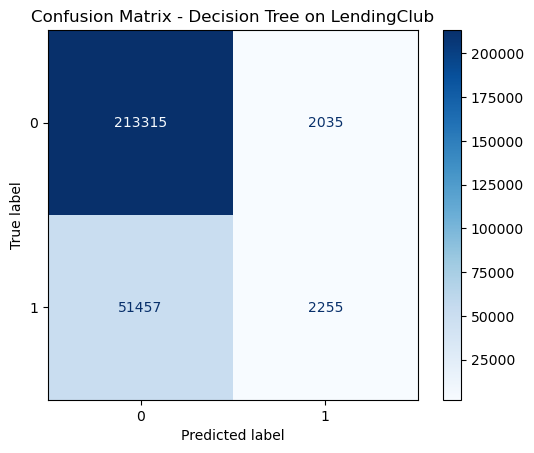

In [73]:
# Predict & Evaluate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
y_pred_lending = tree_lending.predict(X_test_lending)
y_prob_lending = tree_lending.predict_proba(X_test_lending)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test_lending, y_pred_lending))

# ROC AUC score
roc_auc = roc_auc_score(y_test_lending, y_prob_lending)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_lending, y_pred_lending, cmap='Blues')
plt.title('Confusion Matrix - Decision Tree on LendingClub')
plt.show()

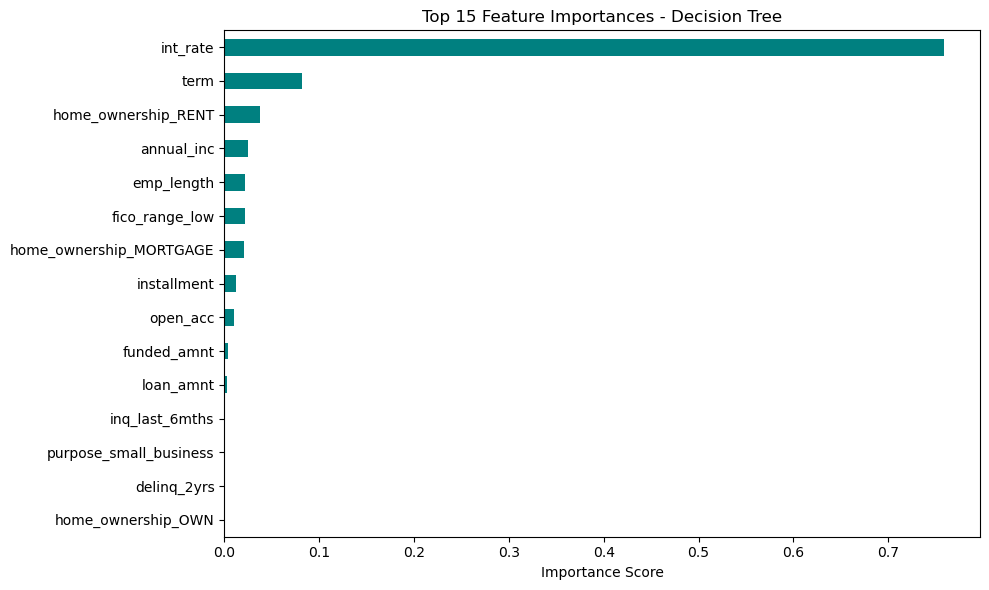

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance from the trained tree
feature_importances = pd.Series(tree_lending.feature_importances_, index=X_train_lending.columns)

# Plot top 15 important features
feature_importances.nlargest(15).plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Top 15 Feature Importances - Decision Tree')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Biggest at top
plt.tight_layout()
plt.show()

# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_lending = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lending.fit(X_train_lending, y_train_lending)

# Predict
y_pred_rf_lending = rf_lending.predict(X_test_lending)
y_prob_rf_lending = rf_lending.predict_proba(X_test_lending)[:, 1]


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89    215350
           1       0.48      0.08      0.14     53712

    accuracy                           0.80    269062
   macro avg       0.64      0.53      0.51    269062
weighted avg       0.74      0.80      0.74    269062

ROC AUC Score: 0.6859


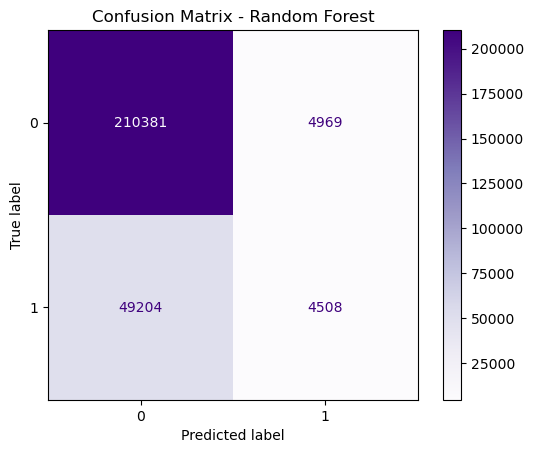

In [76]:
#Evaluate the Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test_lending, y_pred_rf_lending))

print(f"ROC AUC Score: {roc_auc_score(y_test_lending, y_prob_rf_lending):.4f}")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_lending, X_test_lending, y_test_lending, cmap='Purples')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit scaler
scaler = StandardScaler()

X_train_scaled_lending = scaler.fit_transform(X_train_lending)
X_test_scaled_lending = scaler.transform(X_test_lending)


# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg_lending = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg_lending.fit(X_train_scaled_lending, y_train_lending)

# Predict
y_pred_log_lending = log_reg_lending.predict(X_test_scaled_lending)
y_prob_log_lending = log_reg_lending.predict_proba(X_test_scaled_lending)[:, 1]


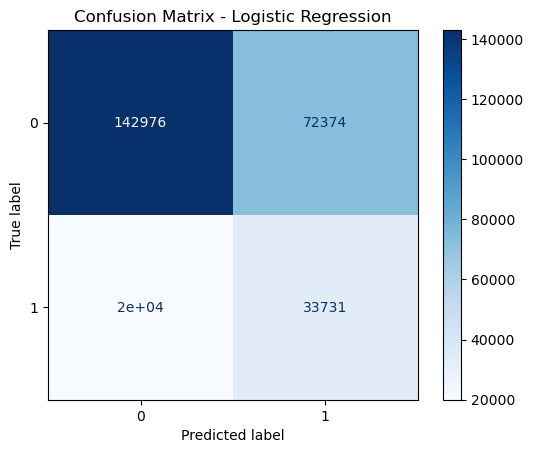

In [79]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_lending, y_pred_log_lending)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [80]:
#Classification Report of Logistic Regression
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test_lending, y_pred_log_lending))

roc_auc = roc_auc_score(y_test_lending, y_prob_log_lending)
print(f"ROC AUC Score: {roc_auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.66      0.76    215350
           1       0.32      0.63      0.42     53712

    accuracy                           0.66    269062
   macro avg       0.60      0.65      0.59    269062
weighted avg       0.77      0.66      0.69    269062

ROC AUC Score: 0.7025


# Neural Network

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build neural network
nn_lending = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_lending.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
nn_lending.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
nn_lending.fit(X_train_scaled_lending, y_train_lending, epochs=50, batch_size=256, validation_data=(X_test_scaled_lending, y_test_lending), callbacks=[early_stop], verbose=1)


Epoch 1/50
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.7966 - loss: 0.4763 - val_accuracy: 0.8008 - val_loss: 0.4566
Epoch 2/50
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8012 - loss: 0.4587 - val_accuracy: 0.8013 - val_loss: 0.4559
Epoch 3/50
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - accuracy: 0.8012 - loss: 0.4580 - val_accuracy: 0.8012 - val_loss: 0.4561
Epoch 4/50
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8013 - loss: 0.4577 - val_accuracy: 0.8013 - val_loss: 0.4554
Epoch 5/50
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.8007 - loss: 0.4575 - val_accuracy: 0.8012 - val_loss: 0.4558
Epoch 6/50
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8010 - loss: 0.4576 - val_accuracy: 0.8014 - val_loss: 0.4553
Epoch 7/50
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8012 - loss: 0.4566 - val_accuracy: 0.8014 - val_loss: 0.4556
Epoch 8/50
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8014 - loss: 0

In [82]:
#Evaluate the model
loss, accuracy = nn_lending.evaluate(X_test_scaled_lending, y_test_lending)
print(f"Test Accuracy: {accuracy:.4f}")

8409/8409 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8020 - loss: 0.4547
Test Accuracy: 0.8014


In [83]:
#Predict & Classify

y_prob_nn_lending = nn_lending.predict(X_test_scaled_lending).flatten()
y_pred_nn_lending = (y_prob_nn_lending >= 0.5).astype(int)


8409/8409 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


In [84]:
from sklearn.metrics import classification_report, roc_auc_score

print("Neural Network Classification Report:")
print(classification_report(y_test_lending, y_pred_nn_lending))

roc_auc_nn_lending = roc_auc_score(y_test_lending, y_prob_nn_lending)
print(f"ROC AUC Score: {roc_auc_nn_lending:.4f}")


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89    215350
           1       0.54      0.03      0.06     53712

    accuracy                           0.80    269062
   macro avg       0.67      0.51      0.48    269062
weighted avg       0.75      0.80      0.72    269062

ROC AUC Score: 0.7076


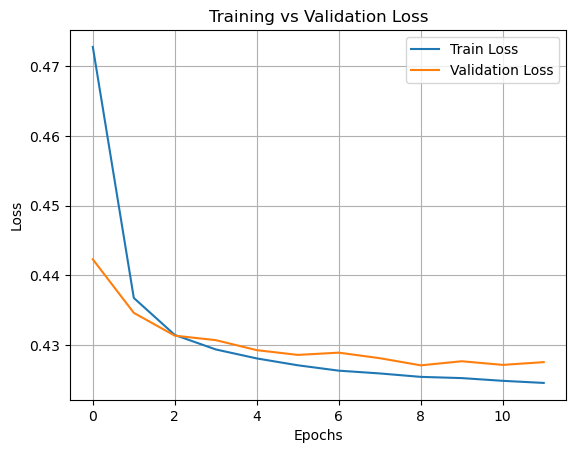

In [85]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Comparison Chart

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
log_metrics_lending = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test_lending, y_pred_log_lending),
    'Precision': precision_score(y_test_lending,  y_pred_log_lending),
    'Recall': recall_score(y_test_lending,  y_pred_log_lending),
    'F1-Score': f1_score(y_test_lending,  y_pred_log_lending),
    'ROC AUC': roc_auc_score(y_test_lending, y_prob_log_lending)
}

#g Decision Tree
tree_metrics_lending = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test_lending, y_pred_lending),
    'Precision': precision_score(y_test_lending, y_pred_lending),
    'Recall': recall_score(y_test_lending, y_pred_lending),
    'F1-Score': f1_score(y_test_lending, y_pred_lending),
    'ROC AUC': roc_auc_score(y_test_lending, y_prob_lending)
}

# Random Forest
rf_metrics_lending = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test_lending, y_pred_rf_lending),
    'Precision': precision_score(y_test_lending, y_pred_rf_lending),
    'Recall': recall_score(y_test_lending, y_pred_rf_lending),
    'F1-Score': f1_score(y_test_lending, y_pred_rf_lending),
    'ROC AUC': roc_auc_score(y_test_lending, y_prob_rf_lending)
}

# Neural Network
nn_metrics_lending = {
    'Model': 'Neural Network',
    'Accuracy': accuracy_score(y_test_lending, y_pred_nn_lending),
    'Precision': precision_score(y_test_lending, y_pred_nn_lending),
    'Recall': recall_score(y_test_lending, y_pred_nn_lending),
    'F1-Score': f1_score(y_test_lending, y_pred_nn_lending),
    'ROC AUC': roc_auc_score(y_test_lending, y_prob_nn_lending)
}


In [87]:
# Import pandas if you haven't yet
import pandas as pd

# Create a comparison table
results_lending_df = pd.DataFrame([log_metrics_lending, tree_metrics_lending, rf_metrics_lending, nn_metrics_lending])

# Round the numbers to 4 decimal places for readability
results_lending_df = results_df.round(4)

# Show the table
print(results_lending_df)

                 Model  Accuracy  Precision  Recall  F1-Score  ROC AUC
0  Logistic Regression    0.7309     0.5888  0.7240    0.6496   0.7909
1        Decision Tree    0.7499     0.5998  0.9985    0.7494   0.7999
2        Random Forest    0.7417     0.6001  0.9304    0.7296   0.7999
3       Neural Network    0.7471     0.5990  0.9828    0.7443   0.8005


Based on the results, the FCNN is the best model to use because it has the best precision-recall balance,, a strong ROC-AUC score, and the highest recall. 